In [33]:
#!pip install faker
#!pip install git+https://github.com/TimeSynth/TimeSynth.git
#!pip install matplotlib

In [3]:
from faker import Faker
import random
import timesynth as ts

In [4]:
fake = Faker()
orders = []
for _ in range(10):
    order = {
        'order_id': fake.uuid4(),
        'customer_name': fake.name()
    }
    orders.append(order)

In [19]:
orders

[{'order_id': '92bac6fe-4dbe-4601-a758-7f8a2dc349f6',
  'customer_name': 'Jorge Mills'},
 {'order_id': 'cd82325e-5d56-43b8-9621-dfbf29a803f9',
  'customer_name': 'Nicholas Hoffman'},
 {'order_id': '4b36798b-441a-476c-bba5-018748e52c12',
  'customer_name': 'Julie Barber'},
 {'order_id': '647e3a82-8935-4eca-82bb-d24666e9584c',
  'customer_name': 'Valerie Olson'},
 {'order_id': 'f3a8015f-191f-4e19-8ae2-8bf903a6de08',
  'customer_name': 'Anna Thompson'},
 {'order_id': 'b1899bfe-8d51-4929-913d-4c04c2499e29',
  'customer_name': 'Tristan Banks'},
 {'order_id': '68489f6e-a0b9-4a3b-a549-f8bc82b1dc82',
  'customer_name': 'William Solomon'},
 {'order_id': 'ef45082f-f974-4021-bc7f-0175f1b05ea9',
  'customer_name': 'Tina Rasmussen'},
 {'order_id': 'd866748d-c75d-4fc6-bbe9-84573f052c4a',
  'customer_name': 'Amy Greene'},
 {'order_id': '91c77b1b-299a-41fa-945e-69acf9a584c7',
  'customer_name': 'Rodney Coleman'}]

In [23]:
def generate_timeseries(signal, noise=None):
    time_sampler = ts.TimeSampler(stop_time=20)
    regular_time_samples = time_sampler.sample_regular_time(num_points=100)
    timeseries = ts.TimeSeries(signal_generator=signal, noise_generator=noise)
    samples, signals, errors = timeseries.sample(regular_time_samples)
    return samples, regular_time_samples, signals, errors

In [29]:
time_sampler = ts.TimeSampler(stop_time=20)
regular_time_samples = time_sampler.sample_regular_time(num_points=100)

signal=ts.signals.Sinusoidal(amplitude=1, frequency=0.25)
noise = ts.noise.GaussianNoise(std=0.3)

timeseries = ts.TimeSeries(signal_generator=signal, noise_generator=noise)

timeseries.sample(regular_time_samples)

(array([ 0.26378051,  0.7814329 ,  0.8735095 ,  0.40460251,  0.92904331,
         1.58122187,  1.15506957,  0.89253731,  0.85901146,  0.14660583,
        -0.18429742, -0.43567028, -0.54717327, -1.11177422, -0.62586722,
        -1.05449356, -1.50704883, -0.76817589, -0.8548058 , -0.58813739,
        -0.15732967,  0.24935461,  0.69429387,  0.56593627,  0.65598633,
         1.14312484,  0.91151419,  1.08354419,  0.68611818,  0.46925693,
        -0.18189846, -0.618067  , -0.66350524, -0.71276914, -0.87687917,
        -1.23892352, -1.12818386, -0.93597756, -0.58584497, -0.1147255 ,
        -0.02044402,  0.33862326,  0.79571242,  1.01182833,  0.40184729,
         0.69227886,  1.10751284,  1.28851374,  0.58063178,  0.25028942,
        -0.26100741, -0.86969239, -0.6841851 , -0.97460141, -0.8071918 ,
        -1.18165252, -0.87284962, -1.01767181, -0.72418762, -0.03307414,
         0.14499786,  0.62619337,  0.77484412,  1.06769437,  0.70135956,
         1.35401639,  1.00455173,  0.40361583,  0.5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

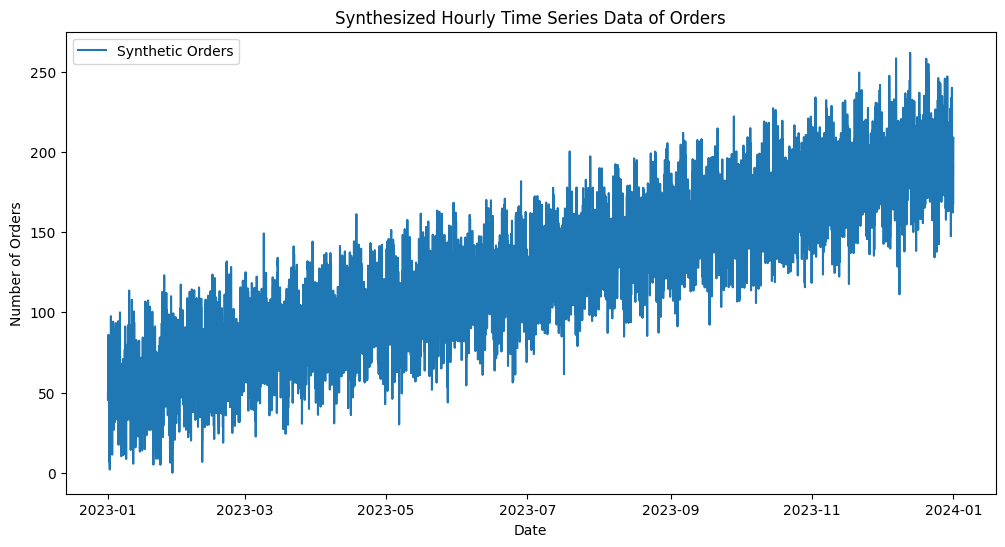

In [35]:
# Set random seed for reproducibility
np.random.seed(42)

# Function to generate synthetic time series data
def generate_synthetic_data(start_date, end_date, freq='H'):
    date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
    
    # Yearly trend
    yearly_trend = np.linspace(50, 200, len(date_rng))
    
    # Daily seasonal pattern
    daily_seasonal = 20 * np.sin(2 * np.pi * date_rng.hour / 24)
    
    # Weekly seasonal pattern
    weekly_seasonal = 10 * np.sin(2 * np.pi * date_rng.dayofweek / 7)
    
    # Random noise
    noise = np.random.normal(loc=0, scale=15, size=len(date_rng))
    
    # Synthesize orders with trends and patterns
    orders = yearly_trend + daily_seasonal + weekly_seasonal + noise
    
    # Ensure non-negative values
    orders = np.maximum(orders, 0)
    
    # Create DataFrame
    data = {'date': date_rng, 'orders': orders}
    df = pd.DataFrame(data)
    
    return df

# Generate synthetic data for one year
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31, 23, 59)
synthetic_data = generate_synthetic_data(start_date, end_date)

# Plot the synthetic data
plt.figure(figsize=(12, 6))
plt.plot(synthetic_data['date'], synthetic_data['orders'], label='Synthetic Orders')
plt.title('Synthesized Hourly Time Series Data of Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()


In [37]:
from numpy.polynomial import Polynomial

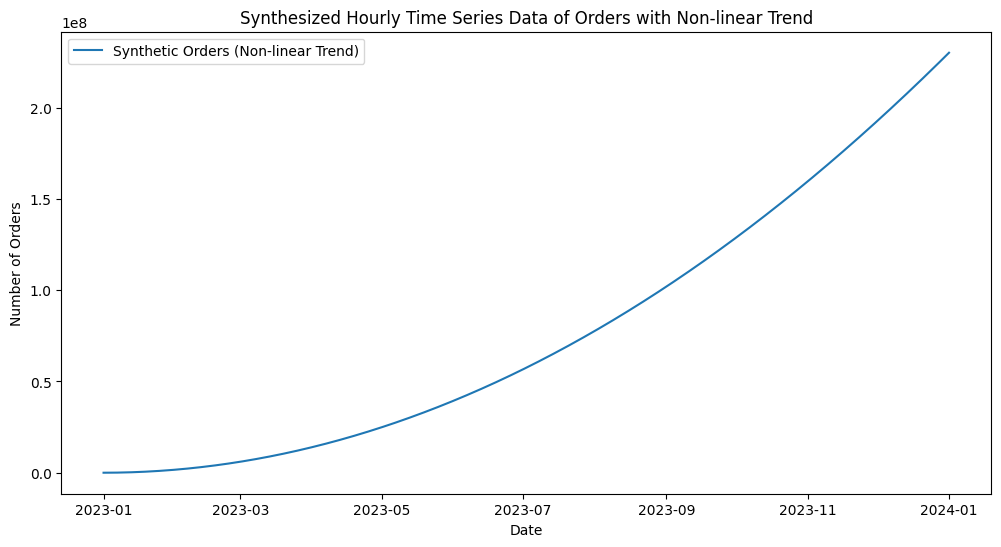

In [44]:
# Set random seed for reproducibility
np.random.seed(42)

# Function to generate synthetic time series data with a non-linear trend
def generate_synthetic_data(start_date, end_date, freq='H'):
    date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
    
    # Non-linear trend (quadratic function)
    trend_coefficients = [3, 2, 1]  # Adjust coefficients as needed
    non_linear_trend = np.polyval(trend_coefficients, np.arange(len(date_rng)))
    
    # Daily seasonal pattern
    daily_seasonal = 20 * np.sin(2 * np.pi * date_rng.hour / 24)
    
    # Weekly seasonal pattern
    weekly_seasonal = 10 * np.sin(2 * np.pi * date_rng.dayofweek / 7)
    
    # Random noise
    noise = np.random.normal(loc=0, scale=15, size=len(date_rng))
    
    # Synthesize orders with non-linear trend and patterns
    orders = non_linear_trend + daily_seasonal + weekly_seasonal + noise
    
    # Ensure non-negative values
    orders = np.maximum(orders, 0)
    
    # Create DataFrame
    data = {'date': date_rng, 'orders': orders}
    df = pd.DataFrame(data)
    
    return df

# Generate synthetic data for one year with a non-linear trend
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31, 23, 59)
synthetic_data_nonlinear_trend = generate_synthetic_data(start_date, end_date)

# Plot the synthetic data with a non-linear trend
plt.figure(figsize=(12, 6))
plt.plot(synthetic_data_nonlinear_trend['date'], synthetic_data_nonlinear_trend['orders'], label='Synthetic Orders (Non-linear Trend)')
plt.title('Synthesized Hourly Time Series Data of Orders with Non-linear Trend')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()
